In [148]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from DecisionTree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
# read the dataset
df=pd.read_csv('KDDTrain+.txt')
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
    ,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
    ,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
df.columns = columns

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


**Data preprocessing**

In [119]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

In [120]:
for row in df.isnull().sum():
    if row != 0:
        print(row)

In [121]:
def normalisation(df, colName):
    dfMin=df[colName].min()
    dfMax=df[colName].max()
    df[colName]=(df[colName]-dfMin)/(dfMax-dfMin)

def oneHotEncoding(df, colName):
    dummies=pd.get_dummies(df[colName],dtype='int')
    for col in dummies.columns:
        col_name=f"{colName}_{col}"
        df[col_name]=dummies[col]
    df.drop(columns=colName,inplace=True)

In [122]:
normalisation(df, 'duration')
oneHotEncoding(df, 'protocol_type')
oneHotEncoding(df, 'service')
oneHotEncoding(df, 'flag')
normalisation(df, 'src_bytes')
normalisation(df, 'dst_bytes')
oneHotEncoding(df, 'land')
normalisation(df, 'wrong_fragment')
normalisation(df, 'urgent')
normalisation(df, 'hot')
normalisation(df, 'num_failed_logins')
oneHotEncoding(df, 'logged_in')
normalisation(df, 'num_compromised')
normalisation(df, 'root_shell')
normalisation(df, 'su_attempted')
normalisation(df, 'num_root')
normalisation(df, 'num_file_creations')
normalisation(df, 'num_shells')
normalisation(df, 'num_access_files')
oneHotEncoding(df, 'is_guest_login')
normalisation(df, 'count')
normalisation(df, 'srv_count')
normalisation(df, 'serror_rate')
normalisation(df, 'srv_serror_rate')
normalisation(df, 'rerror_rate')
normalisation(df, 'srv_rerror_rate')
normalisation(df, 'same_srv_rate')
normalisation(df, 'diff_srv_rate')
normalisation(df, 'srv_diff_host_rate')
normalisation(df, 'dst_host_count')
normalisation(df, 'dst_host_srv_count')
normalisation(df, 'dst_host_same_srv_rate')
normalisation(df, 'dst_host_diff_srv_rate')
normalisation(df, 'dst_host_same_src_port_rate')
normalisation(df, 'dst_host_srv_diff_host_rate')
normalisation(df, 'dst_host_serror_rate')
normalisation(df, 'dst_host_srv_serror_rate')
normalisation(df, 'dst_host_rerror_rate')
normalisation(df, 'dst_host_srv_rerror_rate')

df = df.copy()

C:\Users\maniv\AppData\Local\Temp\ipykernel_16536\3799565333.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name]=dummies[col]
C:\Users\maniv\AppData\Local\Temp\ipykernel_16536\3799565333.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name]=dummies[col]


In [124]:
df['attack_num'] = pd.Categorical(df['attack']).codes
df = df.drop(columns='attack')

**Data Split**

In [125]:
df = df.sample(frac = 1)
train, test = train_test_split(df, test_size=0.15)

y_train = train['attack_num']
X_train = train.drop(columns='attack_num').to_numpy()
y_test = test['attack_num']
X_test = test.drop(columns='attack_num')
cols = X_test.columns
X_test = X_test.to_numpy()

In [126]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

**Model fitting**

In [127]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

**Prediction**

In [128]:
prediction = clf.predict(X_test)

**Accuracy**

In [132]:
from sklearn.metrics import accuracy_score
print(accuracy_score(prediction,y_test))

0.9975127011007621


**Precision**

In [133]:
from sklearn.metrics import precision_score
print(precision_score(prediction, y_test, average="macro", zero_division=np.nan))

0.7564840030660271


**Recall**

In [135]:
from sklearn.metrics import recall_score
print(recall_score(prediction, y_test, average="macro", zero_division=np.nan))

0.7944861805133658


**F1 Score**

In [136]:
from sklearn.metrics import f1_score
print(f1_score(prediction, y_test, average="macro", zero_division=np.nan))

0.7318535147159928


**Feature_importance**

In [137]:
print("feature importance")
print(clf.feature_importances_)

feature importance
{0: 0.03989513016425497, 1: 0.13257321880595407, 2: 0.14937158696947003, 3: 0.0007397811890370034, 4: 0.00025844855885810014, 5: 0.0028470990723145468, 6: 0.0003304665962709288, 7: 0.0012787382041770181, 8: 0.00042188998088443975, 9: 2.7802397409642757e-05, 10: 0.0015883353847992066, 11: 0.001428098128699587, 12: 0.0003128960729188356, 13: 0.00040395754319729306, 14: 3.560836999056317e-08, 15: 0.05368761911413622, 16: 0.036643396769987194, 17: 0.014929064337740402, 18: 0.013364605226111595, 19: 0.009356020371223874, 20: 0.008937736795269071, 21: 0.017967915244483507, 22: 0.010835510905446105, 23: 0.005705538033153952, 24: 0.12040276982915284, 25: 0.08420559981906255, 26: 0.051490584996322995, 27: 0.030843997994167843, 28: 0.045456796638185054, 29: 0.01573452420953114, 30: 0.02983067292969175, 31: 0.02511460217024435, 32: 0.03210441595136202, 33: 0.020160023235906342, 34: 0.01748611954020557, 35: 0.0009520645793972796, 36: 0.0008236228529065221, 37: 0.0008751372377507

In [138]:
result = clf.feature_importances_.items()
data = np.array(list(result))

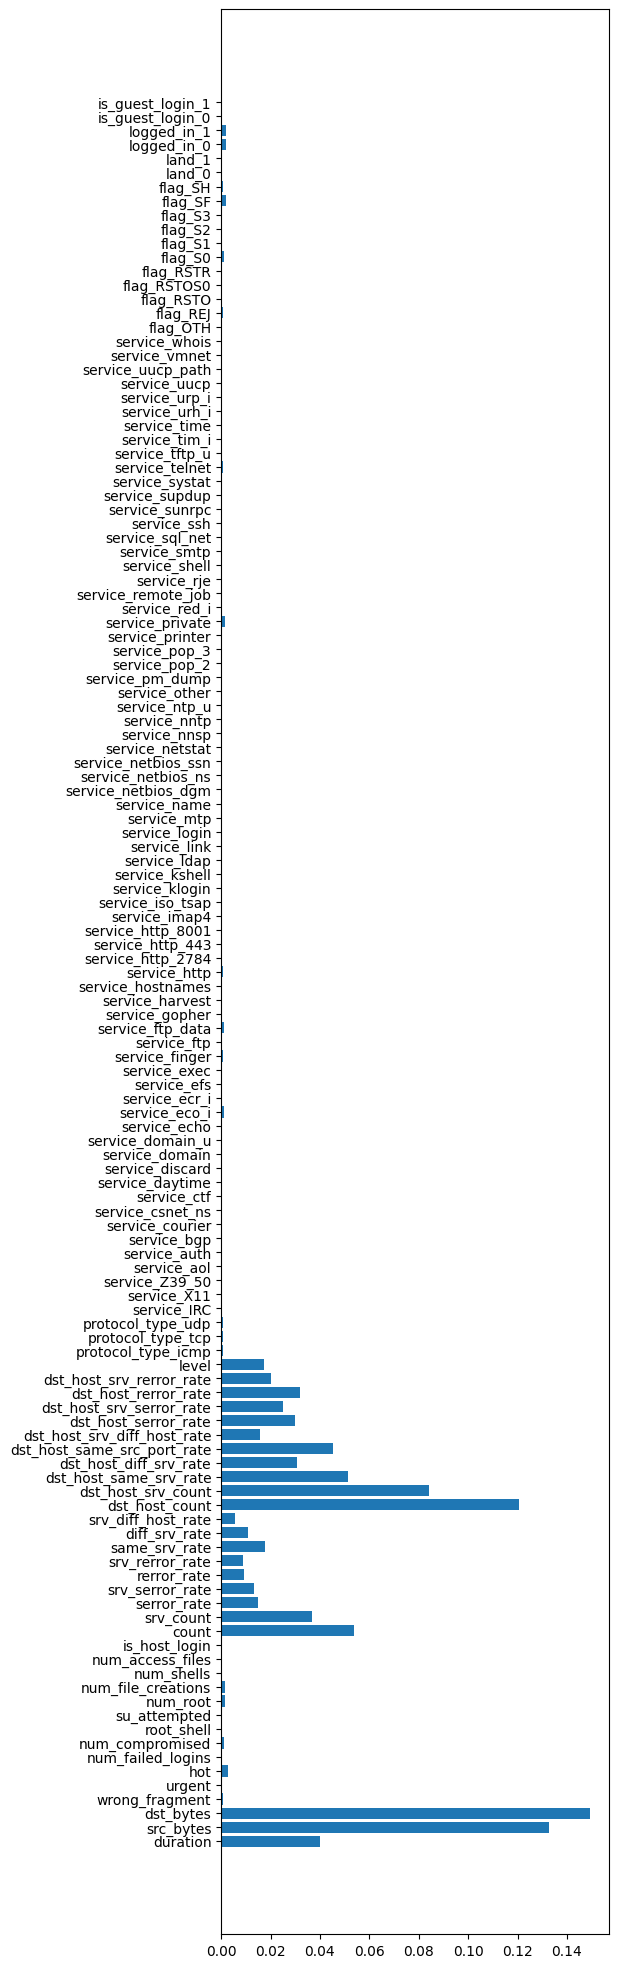

In [139]:
plt.figure(figsize=(5,25))
plt.barh(cols,data[:,1])
plt.show()

**Sensitivity of each features**

In [140]:
def sensitivity_analysis(model, X, y, perturbation):
    sensitivities = {i: [] for i in range(X.shape[1])}
    for sample_idx in range(0, X.shape[0]):
        baseline_prediction = model.predict(X[sample_idx].reshape(1, -1))[0]

        for i in range(X.shape[1]):  # Iterate over each feature
            # Perturb the feature
            perturbed_X = X[sample_idx].copy()
            perturbed_X[i] += perturbation[i]  # Increase the feature

            # Get the prediction after perturbation
            perturbed_prediction = model.predict(perturbed_X.reshape(1, -1))[0]
            sensitivity = abs(perturbed_prediction - baseline_prediction)
            if abs(sensitivity) == abs(np.inf):
                continue
            sensitivities[i].append(sensitivity)
            # Also, check effect of decreasing the feature
            perturbed_X[i] -= 2 * perturbation[i]  # Decrease the feature
            perturbed_prediction_decrease = model.predict(perturbed_X.reshape(1, -1))[0]
            sensitivity_decrease = abs(perturbed_prediction_decrease - baseline_prediction)
            if abs(sensitivity_decrease) == abs(np.inf):
                continue
            sensitivities[i].append(sensitivity_decrease)
    avg_sensitivities = {i: np.mean(sensitivities[i]) for i in sensitivities}
    return avg_sensitivities

**Sensitivity of each feature**

In [141]:
sensitivity = sensitivity_analysis(clf, X_train, y_train, np.mean(X_train,axis=0)*0.1)

In [142]:
print(sensitivity)

{0: 0.0029605140274197765, 1: 0.7825329672382233, 2: 0.006635473869027606, 3: 0.02958179237177332, 4: 5.603496581867085e-05, 5: 0.007947625985281483, 6: 0.0002101311218200157, 7: 0.031706451492397925, 8: 0.0002241398632746834, 9: 0.0003128618924875789, 10: 0.04104094288169151, 11: 0.0001587657364862341, 12: 0.0001587657364862341, 13: 0.0003128618924875789, 14: 0.00025682692666890804, 15: 0.04086349882326572, 16: 0.0027130262617206472, 17: 0.0361845791774067, 18: 0.0002241398632746834, 19: 0.0010646643505547461, 20: 0.0003222010534573574, 21: 0.00025682692666890804, 22: 0.044487093279539765, 23: 0.00018211363891068027, 24: 0.005668870708655535, 25: 0.0012047517651014232, 26: 0.05901882774851507, 27: 0.04206358100788225, 28: 0.003142627666330457, 29: 0.0014288916283761066, 30: 0.0007424632970973887, 31: 0.0011113601554036386, 32: 0.00593970637677911, 33: 0.0003128618924875789, 34: 0.009955545593783855, 35: 0.001097351413948971, 36: 0.06017688370876761, 37: 0.007195823527214315, 38: 0.000

In [143]:
result = sensitivity.items()
data = np.array(list(result))

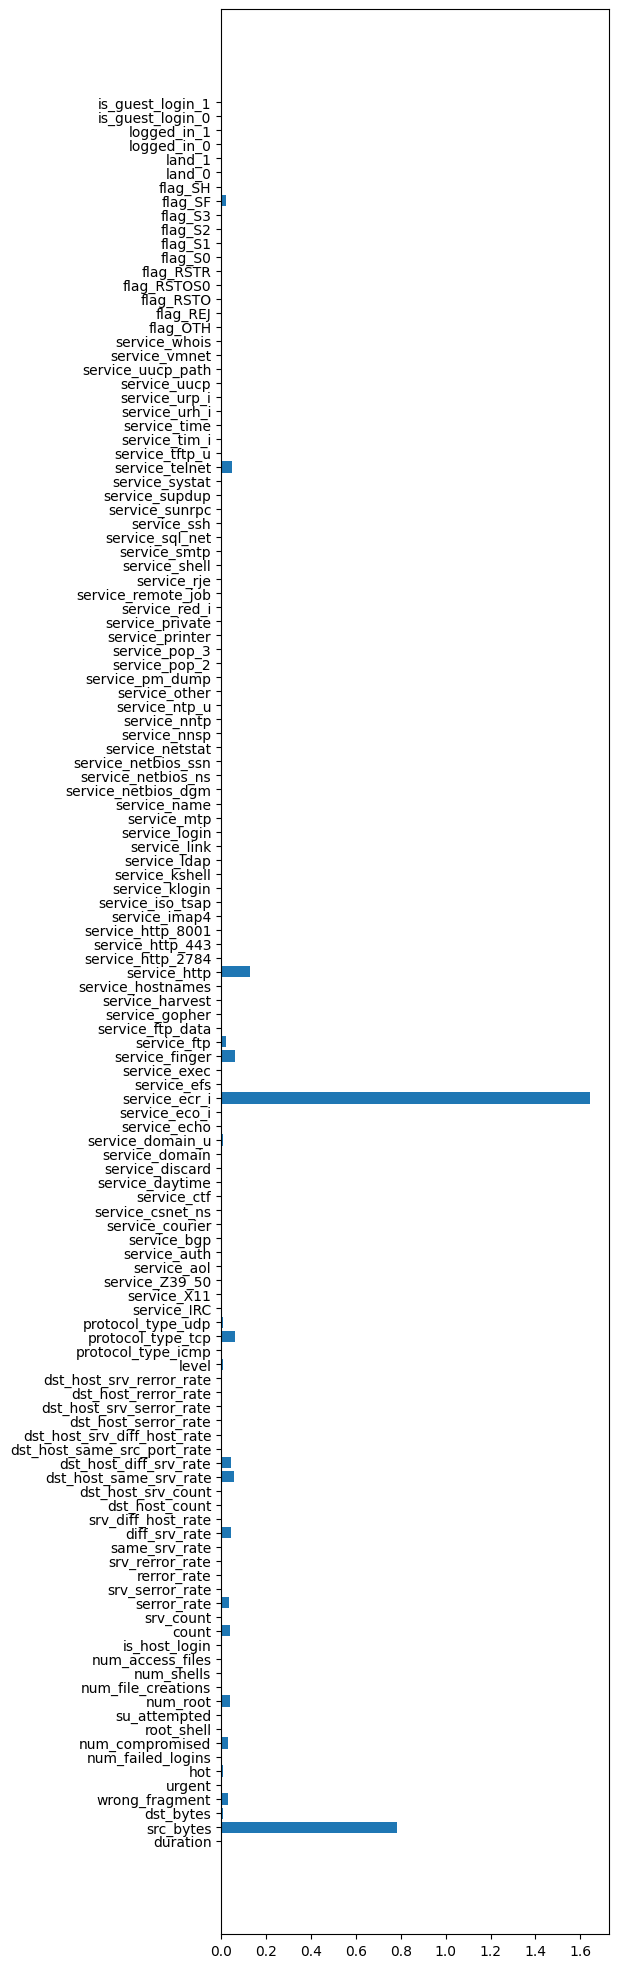

In [144]:
plt.figure(figsize=(5,25))
plt.barh(cols,data[:,1])
plt.show()

In [ ]:
acc_arr = []
prec_arr = []
rec_arr = []
f1_arr = []
for min_samples in range(2,6):
    for max_depth in range(50,150, 10):
        clf = DecisionTreeClassifier(min_samples_split=min_samples, max_tree_depth=max_depth)
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        acc_arr.append(accuracy_score(prediction,y_test))
        prec_arr.append(precision_score(prediction, y_test, average="macro", zero_division=np.nan))
        rec_arr.append(recall_score(prediction, y_test, average="macro", zero_division=np.nan))
        f1_arr.append(f1_score(prediction, y_test, average="macro", zero_division=np.nan))

In [ ]:
x_val=[]
y_val=[]
for i in range(2,6):
    for j in range(50, 150,10):
        x_val.append(i)
        y_val.append(j)

**plot for Accuracy wrt number of trees and depth**

In [156]:
fig = go.Figure(data=[go.Scatter3d(
    x=x_val, y=y_val, z=acc_arr,
    mode='markers',
    marker=dict(
        size=5,
        color=acc_arr,            # Set color to the z values
        colorscale='Viridis'
    )
)])

fig.update_layout(scene=dict(
                    xaxis_title='number of split',
                    yaxis_title='max_depth',
                    zaxis_title='accuracy'))

fig.show()

**plot for precision wrt to number of trees and depth**

In [157]:
fig = go.Figure(data=[go.Scatter3d(
    x=x_val, y=y_val, z=prec_arr,
    mode='markers',
    marker=dict(
        size=5,
        color=acc_arr,            # Set color to the z values
        colorscale='Viridis'
    )
)])

fig.update_layout(scene=dict(
                    xaxis_title='number of split',
                    yaxis_title='max_depth',
                    zaxis_title='precision'))

fig.show()

**Final parameters, as the data is unbalanced, going with the parameter which gives high precision, rather than higher accuracy**

In [165]:
clf = DecisionTreeClassifier(min_samples_split=2, max_tree_depth=50)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
acc = accuracy_score(prediction,y_test)
prec = precision_score(prediction, y_test, average="macro", zero_division=np.nan)
rec = recall_score(prediction, y_test, average="macro", zero_division=np.nan)
f1 = f1_score(prediction, y_test, average="macro", zero_division=np.nan)

In [166]:
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score : ", f1)

Accuracy:  0.9975656223539373
Precision:  0.7899153920728639
Recall:  0.8573855953070124
F1 Score :  0.773631043751035


**using Boost in the Decision Tree, as we are using adaboost from the sklearn, we can't use the DT which we have created**

In [175]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(max_depth=50)
adaboost_model = AdaBoostClassifier(estimator=estimator, n_estimators=50)
adaboost_model.fit(X_train, y_train)

c:\Users\maniv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=50))

In [176]:
prediction = adaboost_model.predict(X_test)

In [177]:
acc = accuracy_score(prediction,y_test)
prec = precision_score(prediction, y_test, average="macro", zero_division=np.nan)
rec = recall_score(prediction, y_test, average="macro", zero_division=np.nan)
f1 = f1_score(prediction, y_test, average="macro", zero_division=np.nan)

In [178]:
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score : ", f1)

Accuracy:  0.9971422523285352
Precision:  0.8056389769206008
Recall:  0.9161402715240923
F1 Score :  0.7841628995227123
